<a href="https://colab.research.google.com/github/hoangson10/code/blob/main/nhan_dien_mon_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
label = ['Banh cuon','Banh mi','Banh xeo','Bun bo Hue','Bun dau mam tom','Chao long','Com tam','Goi cuon','Mi quang','Pho']

In [16]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [17]:
train_image = '/content/drive/MyDrive/codeAI/nhan_dien_mon_an/data/train'
valid_image = '/content/drive/MyDrive/codeAI/nhan_dien_mon_an/data/validation'

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)

In [19]:
train_set = train_datagen.flow_from_directory(train_image,target_size=(200,200),class_mode='categorical')
validation_set = validation_datagen.flow_from_directory(valid_image,target_size=(200,200),class_mode='categorical')

Found 3110 images belonging to 10 classes.
Found 1100 images belonging to 10 classes.


In [20]:
x_train,y_train=next(train_set)

In [21]:
x_train.shape

(32, 200, 200, 3)

In [22]:
y_train.shape

(32, 10)

In [23]:
x_train=x_train.reshape(32,120000)
x_train=x_train.astype ('float32')
x_train=x_train/255
x_train.shape

(32, 120000)

In [25]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (120000,)))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               61440512  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 61,708,298
Trainable params: 61,708,298
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [27]:
model.fit(x_train, y_train, epochs = 300, batch_size = 128)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 2.3037 - accuracy: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 1s 824ms/step - loss: 2.6856 - accuracy: 0.3125
Epoch 3/300
1/1 [==============================] - 1s 842ms/step - loss: 2.7417 - accuracy: 0.2188
Epoch 4/300
1/1 [==============================] - 1s 837ms/step - loss: 2.0475 - accuracy: 0.1562
Epoch 5/300
1/1 [==============================] - 1s 798ms/step - loss: 1.9666 - accuracy: 0.2188
Epoch 6/300
1/1 [==============================] - 1s 809ms/step - loss: 1.9448 - accuracy: 0.3125
Epoch 7/300
1/1 [==============================] - 2s 2s/step - loss: 1.7645 - accuracy: 0.3125
Epoch 8/300
1/1 [==============================] - 2s 2s/step - loss: 1.7224 - accuracy: 0.4688
Epoch 9/300
1/1 [==============================] - 1s 765ms/step - loss: 1.7544 - accuracy: 0.3125
Epoch 10/300
1/1 [==============================] - 1s 773ms/step - loss: 1.7404 - accuracy: 0.1875
Epoch 11/300
1

In [28]:
model.save('nhan_dien_mon_an.h5')

1/1 [==============================] - 0s 56ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 56ms/step
Đây là: Bun bo Hue


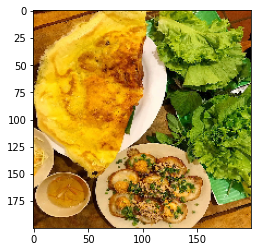

In [33]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/codeAI/nhan_dien_mon_an/data/test/Banh xeo/1022.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])

1/1 [==============================] - 0s 60ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 70ms/step
Đây là: Chao long


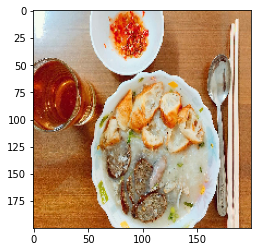

In [61]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/codeAI/nhan_dien_mon_an/data/test/Chao long/1006.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])

1/1 [==============================] - 0s 75ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
1/1 [==============================] - 0s 57ms/step
Đây là: Mi quang


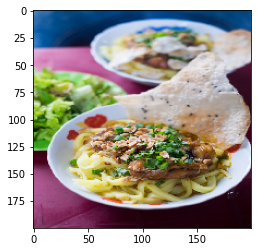

In [65]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
from keras.models import load_model
img = load_img('/content/drive/MyDrive/codeAI/nhan_dien_mon_an/data/test/Mi quang/804.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])